In [229]:
%matplotlib inline
import pandas as pd
data = pd.read_excel("ActualRatings_weeklyGRP.xls", sheet_name='TVRating_Data', index_col=0)
data.head()

,GRP
GRPRatingsDate,
17-Jun-2007 (25),243.60
24-Jun-2007 (26),263.19
01-Jul-2007 (27),269.89
08-Jul-2007 (28),252.88
15-Jul-2007 (29),303.46


In [230]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [231]:
data.index = data.index.str[:11]

In [232]:
data.index = pd.to_datetime(data.index)

In [233]:
import plotly

In [234]:
plotly.tools.set_credentials_file(username='81santi81', api_key='YrIPfoUSq1ESCQ99NVNh')

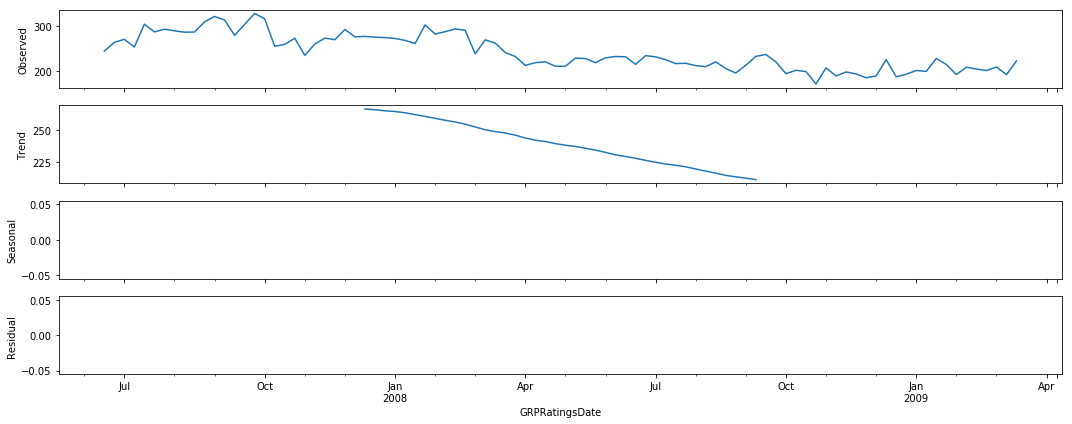

In [235]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()

In [236]:
data.head()

,GRP
GRPRatingsDate,
2007-06-17,243.60
2007-06-24,263.19
2007-07-01,269.89
2007-07-08,252.88
2007-07-15,303.46


In [237]:
ts = data['GRP'] 
ts.head(10)

GRPRatingsDate
2007-06-17    243.60
2007-06-24    263.19
2007-07-01    269.89
2007-07-08    252.88
2007-07-15    303.46
2007-07-22    286.29
2007-07-29    292.28
2007-08-05    288.72
2007-08-12    285.70
2007-08-19    286.01
Name: GRP, dtype: float64

In [238]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2007,6,17)]

243.6

In [239]:
#2. Use ':' if one of the indices is at ends:
training = ts[:'2008-10-26']

In [240]:
test = ts['2008-11-02':]

In [241]:
test.size

20

In [242]:
training.size

72

In [243]:
import plotly.plotly as ply
import cufflinks as cf
training.iplot(title="TRP Ratings Jul 2007 to Sep 2008")

In [244]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Simple Exponential Smoothing

In [245]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# create class
model = SimpleExpSmoothing(data)
# fit model
model_fit = model.fit(smoothing_level=0.3)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [246]:
model_fit.fittedvalues[72:].values

array([195.61689206, 198.91482444, 195.84437711, 196.38306398,
       195.41614478, 192.21330135, 191.21331094, 201.30431766,
       196.98602236, 195.68521565, 197.24365096, 197.73455567,
       206.69718897, 208.93303228, 203.82612259, 205.12928582,
       204.85050007, 203.57835005, 205.07284504, 201.07299152])

In [247]:
### Training
mean_absolute_percentage_error(training.values,model_fit.fittedvalues[:72].values)

5.89138016955568

In [248]:
### Testing

mean_absolute_percentage_error(test.values,model_fit.fittedvalues[72:].values)

4.905776295267451

In [249]:
future_forecast = pd.DataFrame(model_fit.fittedvalues[72:].values,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()

# Time Series Regression using Autoregression (AR)
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.



In [250]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
# fit model
model = AR(training)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=len(training),end=len(training)+len(test)-1, dynamic=False)
print(yhat)

2008-11-02    172.603232
2008-11-09    179.432634
2008-11-16    178.295252
2008-11-23    178.936254
2008-11-30    182.518911
2008-12-07    186.596421
2008-12-14    186.453790
2008-12-21    184.068249
2008-12-28    184.781133
2009-01-04    182.380445
2009-01-11    178.531095
2009-01-18    176.738600
2009-01-25    175.316008
2009-02-01    173.535045
2009-02-08    172.293573
2009-02-15    171.762082
2009-02-22    171.679135
2009-03-01    171.071334
2009-03-08    170.521396
2009-03-15    170.141089
Freq: W-SUN, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [251]:
mean_absolute_percentage_error(test.values,yhat)

11.653553899362201

In [252]:
future_forecast = pd.DataFrame(yhat,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()

Lag: 11
Coefficients: const      1.413652
L1.GRP     0.727900
L2.GRP    -0.107417
L3.GRP     0.335433
L4.GRP     0.040549
L5.GRP    -0.102832
L6.GRP    -0.046191
L7.GRP    -0.087119
L8.GRP     0.130850
L9.GRP    -0.057891
L10.GRP    0.135577
L11.GRP    0.010381
dtype: float64
predicted=172.603232, expected=206.610000
predicted=179.432634, expected=188.680000
predicted=178.295252, expected=197.640000
predicted=178.936254, expected=193.160000
predicted=182.518911, expected=184.740000
predicted=186.596421, expected=188.880000
predicted=186.453790, expected=224.850000
predicted=184.068249, expected=186.910000
predicted=184.781133, expected=192.650000
predicted=182.380445, expected=200.880000
predicted=178.531095, expected=198.880000
predicted=176.738600, expected=227.610000
predicted=175.316008, expected=214.150000
predicted=173.535045, expected=191.910000
predicted=172.293573, expected=208.170000
predicted=171.762082, expected=204.200000
predicted=171.679135, expected=200.610000
predicted

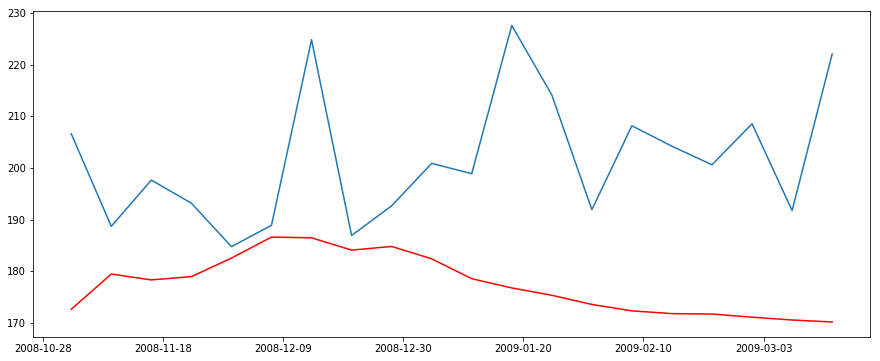

In [253]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(training), end=len(training)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [254]:
# train autoregression
model = AR(training)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = training[len(training)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=172.603232, expected=206.610000
predicted=204.186154, expected=188.680000
predicted=181.373497, expected=197.640000
predicted=203.430973, expected=193.160000
predicted=195.275232, expected=184.740000
predicted=190.052141, expected=188.880000
predicted=190.911232, expected=224.850000
predicted=207.714292, expected=186.910000
predicted=184.869230, expected=192.650000
predicted=197.445527, expected=200.880000
predicted=198.691687, expected=198.880000
predicted=190.418802, expected=227.610000
predicted=216.605097, expected=214.150000
predicted=201.927657, expected=191.910000
predicted=202.213689, expected=208.170000
predicted=205.840887, expected=204.200000
predicted=197.486877, expected=200.610000
predicted=196.057999, expected=208.560000
predicted=201.610081, expected=191.740000
predicted=192.725991, expected=222.070000
Test MSE: 309.433


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [255]:
mean_absolute_percentage_error(test.values,predictions)

6.445017298838271

In [256]:
future_forecast = pd.DataFrame(predictions,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()

In [257]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 11
Coefficients: const      1.413652
L1.GRP     0.727900
L2.GRP    -0.107417
L3.GRP     0.335433
L4.GRP     0.040549
L5.GRP    -0.102832
L6.GRP    -0.046191
L7.GRP    -0.087119
L8.GRP     0.130850
L9.GRP    -0.057891
L10.GRP    0.135577
L11.GRP    0.010381
dtype: float64


#### Decomposition

## Moving Average (MA)
The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

In [175]:

# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
# fit model
model = ARMA(training, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=72,end=91)
print(yhat)

2008-11-02    213.620439
2008-11-09    251.209828
2008-11-16    251.209828
2008-11-23    251.209828
2008-11-30    251.209828
2008-12-07    251.209828
2008-12-14    251.209828
2008-12-21    251.209828
2008-12-28    251.209828
2009-01-04    251.209828
2009-01-11    251.209828
2009-01-18    251.209828
2009-01-25    251.209828
2009-02-01    251.209828
2009-02-08    251.209828
2009-02-15    251.209828
2009-02-22    251.209828
2009-03-01    251.209828
2009-03-08    251.209828
2009-03-15    251.209828
Freq: W-SUN, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [176]:
mean_absolute_percentage_error(test.values,yhat)

24.13204852145559

### Autoregressive Moving Average (ARMA)
The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.



In [68]:

# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
# fit model
model = ARMA(training, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=72,end=91)
print(yhat)

2008-11-02    167.322673
2008-11-09    163.835976
2008-11-16    160.280073
2008-11-23    156.655128
2008-11-30    152.961312
2008-12-07    149.198797
2008-12-14    145.367757
2008-12-21    141.468372
2008-12-28    137.500822
2009-01-04    133.465293
2009-01-11    129.361971
2009-01-18    125.191047
2009-01-25    120.952715
2009-02-01    116.647172
2009-02-08    112.274615
2009-02-15    107.835249
2009-02-22    103.329279
2009-03-01     98.756912
2009-03-08     94.118361
2009-03-15     89.413839
Freq: W-SUN, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [69]:
mean_absolute_percentage_error(test.values,yhat)

34.88897743466905

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.



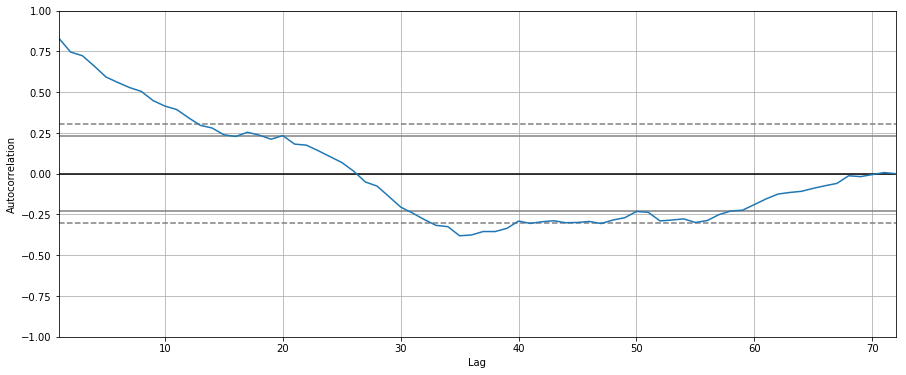

In [258]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(training)
pyplot.show()

### Autoregressive Integrated Moving Average (ARIMA)
The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.

In [260]:

# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
# fit model
model = ARIMA(training, order=(3, 0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=72,end=91)
print(yhat)

2008-11-02    183.266181
2008-11-09    191.285612
2008-11-16    188.903204
2008-11-23    190.870878
2008-11-30    194.347119
2008-12-07    195.949865
2008-12-14    197.551421
2008-12-21    199.558230
2008-12-28    201.309427
2009-01-04    202.897242
2009-01-11    204.489843
2009-01-18    206.013926
2009-01-25    207.448531
2009-02-01    208.826148
2009-02-08    210.147420
2009-02-15    211.407158
2009-02-22    212.610989
2009-03-01    213.762703
2009-03-08    214.863350
2009-03-15    215.915188
Freq: W-SUN, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [261]:
mean_absolute_percentage_error(test.values,yhat)

5.1837898363940775

In [262]:
error = mean_squared_error(test, yhat)
error

169.41311539285493

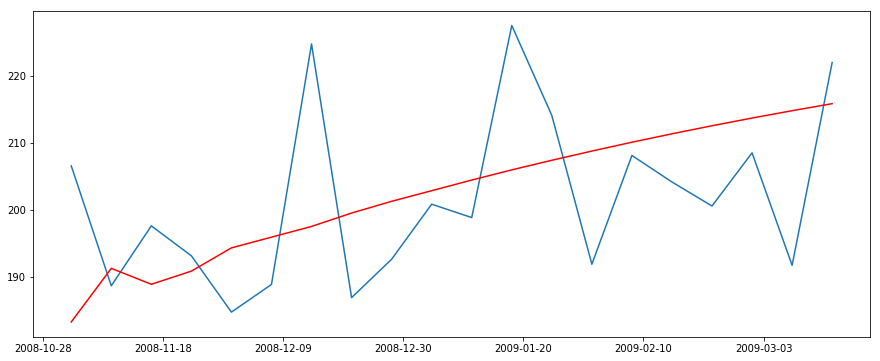

In [263]:
# plot
pyplot.plot(test)
pyplot.plot(yhat, color='red')
pyplot.show()

#### Rolling Forecast Arima

In [17]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
history = [x for x in training]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(20,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=176.396163, expected=206.610000
predicted=193.360895, expected=188.680000
predicted=187.211446, expected=197.640000
predicted=198.424006, expected=193.160000
predicted=195.952837, expected=184.740000
predicted=191.745516, expected=188.880000
predicted=193.688987, expected=224.850000
predicted=197.418407, expected=186.910000
predicted=179.791069, expected=192.650000
predicted=188.621050, expected=200.880000
predicted=199.814389, expected=198.880000
predicted=200.738762, expected=227.610000
predicted=219.842681, expected=214.150000
predicted=206.945273, expected=191.910000
predicted=206.856780, expected=208.170000
predicted=194.256965, expected=204.200000
predicted=183.678237, expected=200.610000
predicted=203.054243, expected=208.560000
predicted=193.993671, expected=191.740000
predicted=185.565449, expected=222.070000
Test MSE: 266.945


In [18]:
myFormattedPredictions = list(np.around(np.array(predictions),2))

In [19]:
mean_absolute_percentage_error(test.values,myFormattedPredictions)

6.095226756537542

In [20]:
pred_series= pd.Series(myFormattedPredictions)

In [21]:
pred_series.index = test.index

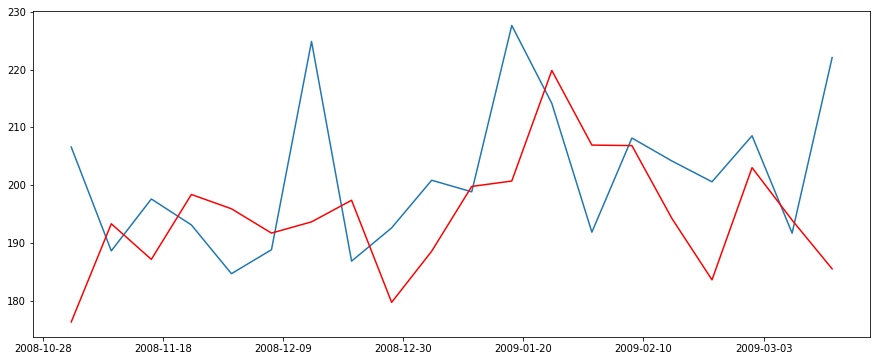

In [22]:
# plot
pyplot.plot(test)
pyplot.plot(pred_series, color='red')
pyplot.show()